# STM32

Author: <font color=blue> **Rey Francis A. Famulagan** </font>

A compilation of C scripts to a notebook written from [video tutorials](https://www.youtube.com/watch?v=15z_vn4H41U&ab_channel=JoeTheProfessor) of Joe the professor, Stackoverflow, Quora, and many other resources that I wouldn't mention.

This was all compiled and written to Jupyters notebook : 

* To make it more readable
* Clear flow of topics
* Print information from a lot of resources without going through proper citations
* And lastly, for the Author's convenience

<span class="burk">Some of the statements, images, and codes were directly copied and the author acknowledges that he does not own the said copied statements, images, and codes that are written hereof.</span> For the license, see the GNU Lesser General Public License for more details.

                                                    <intentional space>                                                         

## ISA

ISA which stands for Instruction Set Architecture. It consist of the places where the processor stores or obtain information. Probably the most important of those are the registers. A processor has many thousands of registers that are not visible to the programmer. However, when we talk about the registers that are available to the programmer we refer to the registers that we use as a scratchpad memory or short term memory. This registers are located very close to the processors ALU and they are designed to be very fast at the expense of using more power and more transistors. 

Then, we also have the memory associated with the processor. Typically, there are two main types of memory, the flash memory is where the program memory is stored. It is a non volatile memory which mean the contents are preserved even if the power is turned off and then immediately avaiable when the power is turned back on.  The next type variables are called RAM. Most of the variables that will be used by the programmer will be stored in RAM. The contents of RAM will be undefined when power is turned on. 

### How processor manipulates data?

Processors like the Cortex M family can't execute programs om a high level language like Java and C directly. Each statement in a program must be converted into a sequence of assembly language instructions which are the native programming language of the processor.

Most of the code written for embedded applications is written on a high level language but it's also true that most embedded programming language will require some code to be written on assembly language. 


                                                    <intentional space>                                                         

## Registers

This architecture has 16 generic registers which means that any of these registers can be use as an operand of an assembly language instruction. The truth though, is that there are only 13 that are intended for general purpose registers. They can hold data or address and it is important to note that the registers don't know whether their contents are data or an address.  

There are 3 main data types which are *byte* (8 bit), *half word* (16 bit) and *word* (32 bit). 

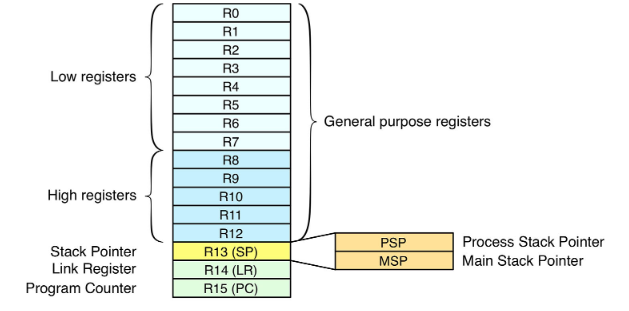

### Special purpose registers

R13 is the stack pointer. The stack pointer keeps track of the memory address of the last value that stored on the stack. 

R14 is the link register. Whenever you call a subroutine, the link register is automatically loaded with return address. For example, an interrupt is called somewhere between in the middle of the code, the R14 will be the register where the return address to be stored so that after the interrupt is called it can resume the normal. 

R15 is the program counter. This contains the address of the next assembly instruction that will be executed. It will be useful to be able to use the program counter as pointer to access constants. 



                                                    <intentional space>                                                         

## Memory

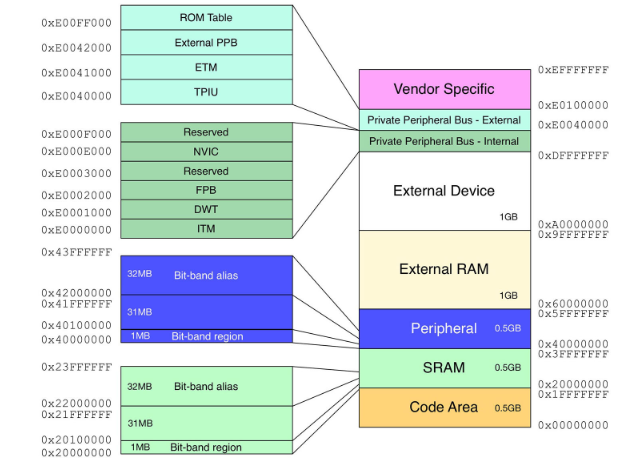

The Cortex-M processor has a full 32-bit addresses that support 4 Gib memory space. Take note that Gib stands for Gibibyte which is different from GB, Gigabyte. One gibibyte means $2^{30}$ bytes from the binary prefix "gibi" which means $2^{30}.$ On the other hand, giga means $10^9.$

As you can see from the image, the memory addresses will range from 32 bits that are all zero **(0x00000000)** which is equivalent to **(0b 0000 0000 0000 0000 0000 0000 0000 0000)** and **(0xFFFFFFFF)** which is equivalent to **(0b 1111 1111 1111 1111 1111 1111 1111 1111).** The conversion of bits to hexadecimal is quite easy. Each hexadecimal needs 4 bits. For example, a word of (0b 1000 1011 1001 0111 0100 0111 1111 0000) is converted as (0x8B9747F0), that is, each 4 binary digits is equivalent to 1 hexadecimal character. 

This is also the reason why the memory space of the Cortex-M is $2^{30}$ or $2^{32}$ to be exact. Since there are 2 values in the binary, that is, 1 and 0 and there are 32 bits. Hence, $2^{32} = 2^{2} \cdot 2^{10} \cdot 2^{10} \cdot 2^{10} = 4 \cdot 1000 = 4 \text{ Gib}.$ 

### Memory addresses are byte addresses

Particular memory address specifies a particular byte in a memory and if a processor needs to access a halfword, it will fetch a byte at the byte address and the byte at the subsequent byte address. Likewise, if we need to access an entire word in the memory, the processor begins at the specified byte address but also accesses the next three byte addresses to get a full 32 bit word. 

                                                    <intentional space>                                                         

## The Move instruction

The move instruction is assembly language is written as MOV <Register Address> <Value>. For example, in the first box, we are moving 0x00000011 into the register R0. In the second, the value 2560 in decimal is 0x00000A00 in hexadecimal. 

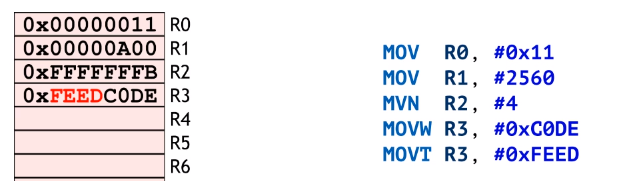
    
The MVN is move not which means we move the complement or the bitwise inverse of the passed value. If we wish to move a specific value, we will use a series of two instructions. The first is the MOVW which means move wide. What this does is to move the last for characters of the hexadecimal. Then the MOVT or move top moves the first 4 characters of the hexadecimal. 



                                                    <intentional space>                                                         

## Load and Store instruction

The thing we need to remember about the move instruction is that it can only access registers. The move instruction does not access memory. We need another way of doing that. And the way we access memory is the load and store instructions. 

It said that the Cortex-M architecture is a load store architecture because most instructions do not access memory. For example, an add instruction can not directly read a value from the memory and add to something. The result from the add instruction can't be put directly into memory. To access a memory, either to get something from a memory location or to store something in a memory location. We have to use the load and store instruction. 

### Why we can't use the move instruction to load a 32 bit address from the memory?

The reason why can't do this with move instruction is because it would require embedding a 32 bit immediate value address (or the 32 bit value) into an instruction. That is, 32 bit value + instruction >> 32 bit. Since instructions can't be longer than 32 bits then it would be impossible. 

The load instruction uses a register as a pointer so it gets the memory address from a register. Note that when we use a register as an address pointer, we enclose its name in square brackets. 

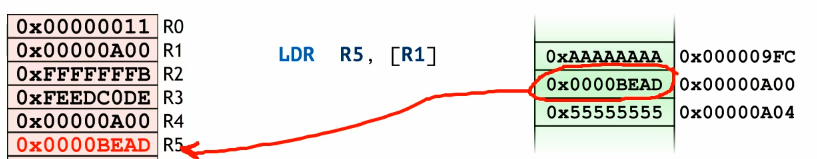

We can see from the image that [R1] holds the values of the address in the memory that we are going to fetch. We can see that the value of the in the memory in the right having an address of 0x00000A00 is 0x0000BEAD. Then we put that value into register 5. 

If we want to copy a value from a register out to some location in the memory, then we need to use the store instruction. The first operand of the store instruction is the source of the data value and the given memory address (address pointer) is the destination. The store instruction is one of the few instruction that uses the first operand as the source and the second operand as the destination instead of the other way around. 

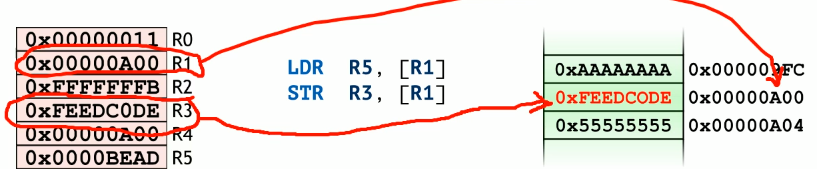

In this example, the memory address will be [R1] and the value to be stored will be the value inside R3. 

Take note of the terminologies. Registers don't have an address, they only have a name and a value that they hold which means it would be incorrect to say that a register address. Instead, the memory address is the value that is stored in the specific register. 

### Offset loading

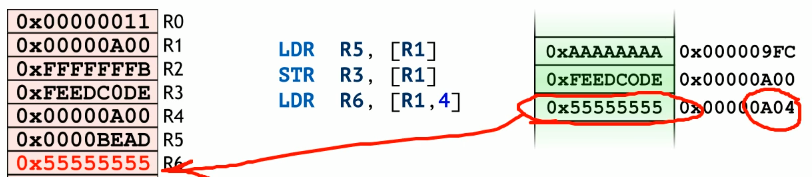

In this example, we load the value of address pointer [R1] plus 4. Since the address pointer [R1] is 0x00000A00 then adding 4 would be 0x00000A04. Hence, we are fetching from the memory address 0x00000A04 and will be storing it at register 6.



### Literal Addressing

There is a very important special case in load instruction that can be used to load any 32 bit constant. This is accomplished using the literal addressing mode. One nice aspect of using literal addressing is that we can compile or assemble a piece of code without knowing the actual value of the constant should be as long as we know the name of the constant. 

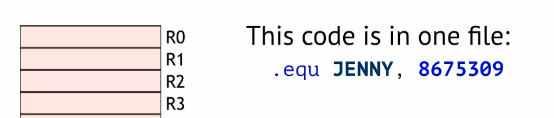

Note that the .equ directive does not cause the value to be stored in the memory. It just associates the constant value with the symbolic name JENNY. We know that constant must be stored in a non volatile program memory.

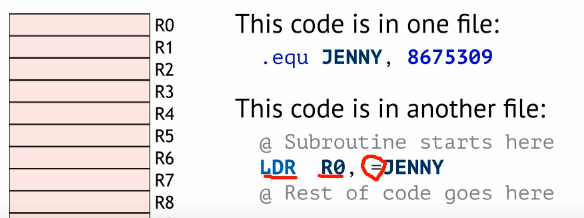

In another file, we start writing another subroutine or function that gets to use JENNY constant. The first thing we do in our subroutine is load the value of our constant in our register 0, R0. We can use the the load instruction as R0 the destination but the source is specified as equal sign followed by the symbolic name associated with the constant value. It is a special syntax for the source operand that identifies the literal addresing mode. 

Basically, the value is not stored anywhere but in the end of the subroutine code it will be stored to some address that is offset from the address of the subroutine code. To explain it further, there is a special register that already knows the address of the instruction at the time it is being executed. This is called the Program Counter register. 

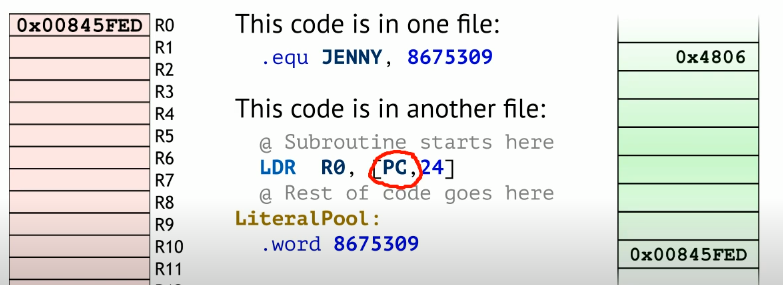

As we can see, the literal addressing is just a special case of offset loading where the we offset the program counter containing the address of the last subroutine. To summarize, syntax JENNY will be stored somewhere in the memory space where it is offset of 24 from the address of the of last subroutine that used it. 

### So what is so cool about this feature?

The very cool thing about this feature when the program counter changes which means if we have another syntax that is called in another subroutine, then the the value of PC will change but the offset 24 will stay the same. 
